# **INTRODUCTION**

Welcome to our Car Price Prediction project! In today's automotive market, accurately determining the value of a used car can be challenging for both sellers and buyers. Factors such as the car's age, mileage, and condition, as well as market trends, can all influence its selling price. In this project, we address this challenge by leveraging machine learning techniques to develop a predictive model that can estimate the selling price of cars based on various features.

Our goal is to provide a reliable tool that empowers car sellers to set competitive prices and helps buyers make informed decisions. By analyzing historical data on car sales and their attributes, we aim to uncover patterns and relationships that can guide our predictive model.

### **IMPORTING THE LIBRARIES**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Data PreProcessing and Collection**

In [3]:
#Loading the dataset
dataset = pd.read_csv('/content/CAR_DATA_EXTENDED.csv')

In [4]:
#Displaying the top 5 rows of the dataset
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#Displaying the last 5 rows of the dataset
dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
796,Bajaj Pulsar NS 200,2012,19.01,31.65,145102,Diesel,Dealer,Manual,1
797,Royal Enfield Classic 500,2014,42.48,49.76,347337,Diesel,Individual,Manual,0
798,Yamaha FZ S V 2.0,2003,7.52,11.70,137196,Petrol,Individual,Automatic,3
799,Bajaj ct 100,2004,9.38,22.68,338427,CNG,Dealer,Automatic,3
800,Honda Dream Yuga,2007,2.61,6.09,184122,CNG,Individual,Automatic,1


In [6]:
#Shape of the dataset
dataset.shape

(801, 9)

In [7]:
print("Rows presented in the dataset: ",dataset.shape[0] )
print("Columns presented in the dataset: ",dataset.shape[1] )

Rows presented in the dataset:  801
Columns presented in the dataset:  9


In [8]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       801 non-null    object 
 1   Year           801 non-null    int64  
 2   Selling_Price  801 non-null    float64
 3   Present_Price  801 non-null    float64
 4   Kms_Driven     801 non-null    int64  
 5   Fuel_Type      801 non-null    object 
 6   Seller_Type    801 non-null    object 
 7   Transmission   801 non-null    object 
 8   Owner          801 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 56.4+ KB


## **Checking null values and removing duplicates**

In [9]:
#Checking for null values
dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [10]:
#Checking for duplicated values
dataset.duplicated().sum()

np.int64(2)

In [11]:
#Dropping duplicate rows
dataset.drop_duplicates(inplace=True)

In [12]:
dataset.duplicated().sum()

np.int64(0)

In [13]:
#Statistical categorical features
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2011.536921,20.013004,30.755857,173104.998748,0.937422
std,4.304899,19.547649,28.140937,157634.398612,1.129947
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2008.000000,4.025000,6.800000,36000.000000,0.000000
50%,2012.000000,11.940000,20.040000,110276.000000,0.000000
75%,2015.000000,34.420000,54.780000,303338.000000,2.000000
max,2018.000000,80.070000,92.600000,500000.000000,3.000000


In [15]:
dataset.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


## **Adding a new column for lifespan of the model**

In [16]:
#Importing date time library for lifespan of the car
import datetime
date_time = datetime.datetime.now()
dataset['Age'] = date_time.year - dataset['Year']

In [17]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


# **Removing the outliers**

In [18]:
#Selecting categorical features
categorical_features=dataset[['Fuel_Type','Seller_Type','Transmission']]

<Axes: xlabel='Selling_Price'>

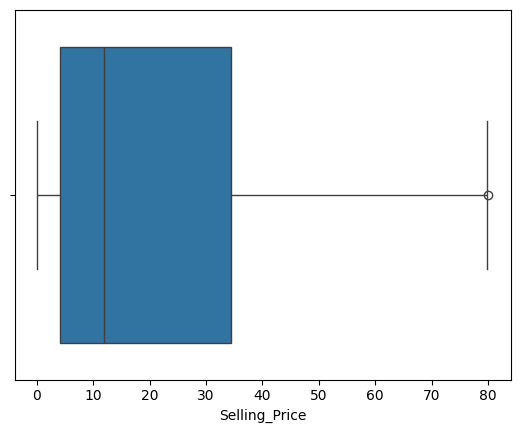

In [19]:
#Importing label encoder from preprocessing from sklearn import preprocessing
import seaborn as sns
sns.boxplot(x='Selling_Price',data=dataset)

In [20]:
#Checking for any outliers present in the target variable
sorted(dataset['Selling_Price'],reverse=True)

[80.07,
 79.89,
 77.28,
 77.19,
 76.5,
 73.43,
 72.98,
 70.99,
 70.16,
 69.82,
 68.64,
 68.57,
 68.41,
 68.28,
 66.8,
 66.12,
 66.06,
 65.99,
 65.85,
 65.46,
 65.11,
 65.07,
 65.03,
 64.9,
 64.88,
 63.68,
 63.28,
 62.76,
 62.33,
 61.71,
 61.55,
 61.46,
 61.46,
 61.39,
 61.02,
 60.92,
 60.3,
 60.14,
 59.73,
 59.56,
 59.44,
 58.9,
 58.61,
 58.58,
 57.54,
 57.44,
 57.43,
 57.29,
 57.09,
 56.06,
 56.04,
 55.85,
 54.82,
 54.78,
 54.6,
 54.58,
 54.35,
 54.28,
 54.27,
 54.24,
 54.01,
 53.9,
 53.9,
 53.8,
 53.68,
 53.55,
 53.27,
 52.92,
 52.79,
 52.72,
 52.28,
 52.11,
 52.09,
 51.45,
 51.28,
 51.17,
 51.08,
 50.26,
 50.0,
 49.82,
 49.73,
 49.46,
 49.37,
 49.17,
 49.04,
 48.68,
 48.67,
 48.62,
 48.45,
 47.98,
 47.93,
 47.74,
 47.63,
 47.37,
 47.21,
 47.08,
 47.02,
 47.0,
 46.73,
 46.56,
 46.41,
 46.27,
 46.11,
 46.1,
 46.04,
 46.02,
 45.93,
 45.88,
 45.85,
 45.83,
 45.78,
 45.61,
 45.26,
 45.08,
 45.07,
 45.03,
 45.02,
 44.51,
 44.21,
 44.19,
 43.83,
 43.8,
 43.76,
 43.73,
 43.69,
 43.48,
 42.8

In [21]:
#Filtering out outliers in the 'Selling_Proce' column
dataset = dataset[~(dataset['Selling_Price']>=33.0) & (dataset['Selling_Price']<=35.0)]

In [22]:
dataset.shape

(583, 10)

In [23]:
#Encoding the unique values of 'Fuel_Type','Seller_Type','Transmission'
dataset.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11


## **Encoding to Unique values from our data**

In [24]:
dataset['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [25]:
dataset['Fuel_Type'] = dataset['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [26]:
dataset['Fuel_Type'].unique()

array([0, 1, 2])

In [27]:
dataset['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [28]:
dataset['Seller_Type'] = dataset['Seller_Type'].map({'Dealer':0,'Individual':1})

In [29]:
dataset['Seller_Type'].unique()

array([0, 1])

In [30]:
dataset['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [31]:
dataset['Transmission'] = dataset['Transmission'].map({'Manual':0,'Automatic':1})

In [32]:
dataset['Transmission'].unique()

array([0, 1])

In [33]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,11
1,sx4,2013,4.75,9.54,43000,1,0,0,0,12
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,8
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,14
4,swift,2014,4.60,6.87,42450,1,0,0,0,11


In [34]:
#Splitting the feature and target variable
x = dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = dataset['Selling_Price']

In [35]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
795,26.79
796,19.01
798,7.52
799,9.38


## **DATA VISUALIZATION    (Visualizing the data)**

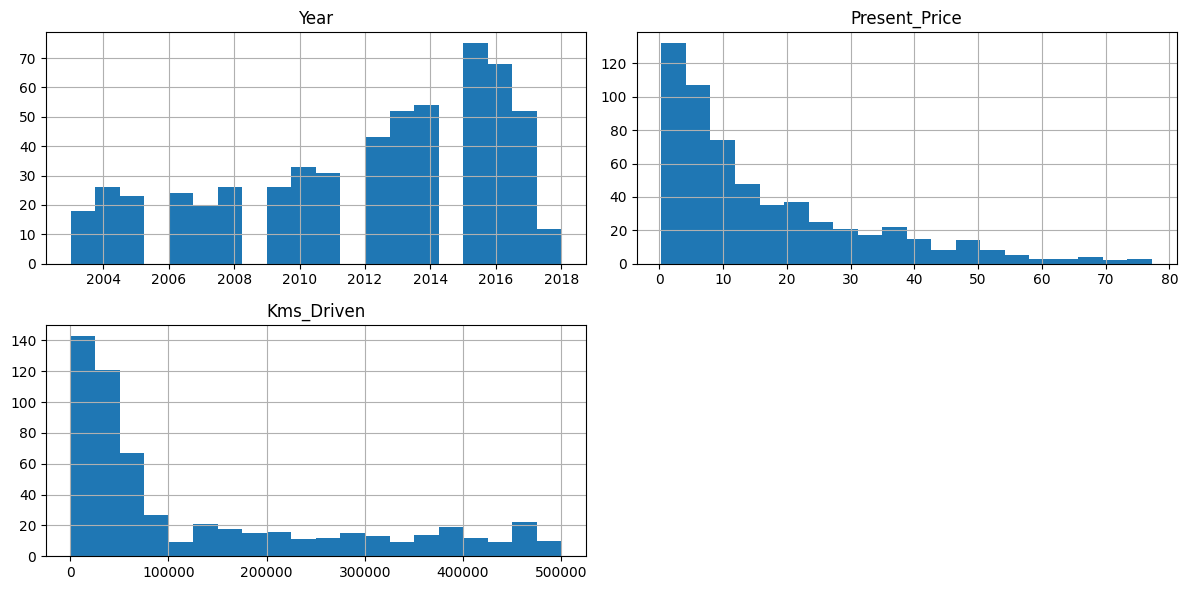

In [36]:
#Histograms
dataset[['Year','Present_Price','Kms_Driven']].hist(figsize=(12,6),bins=20)
plt.tight_layout()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Numeric Features')
plt.show()

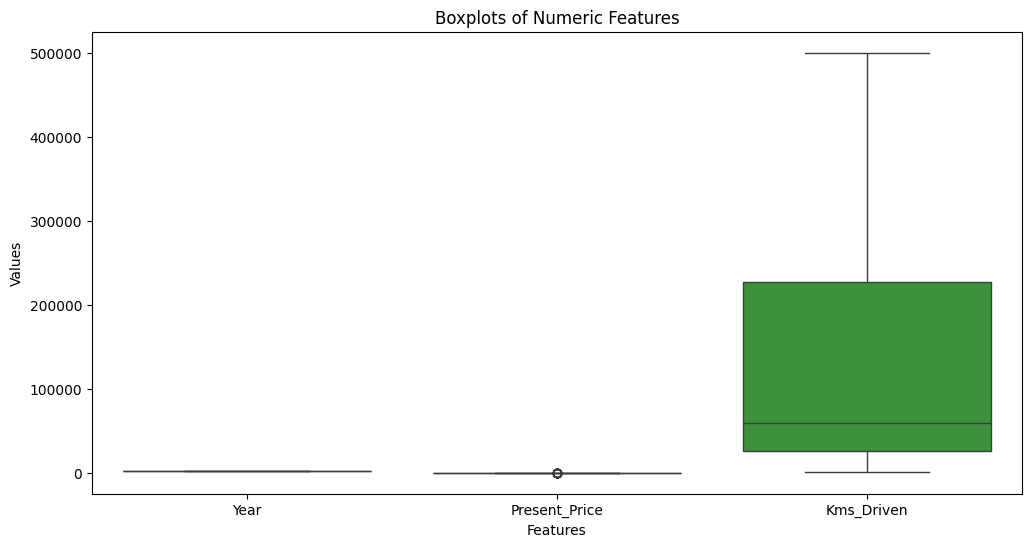

In [37]:
#Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset[['Year','Present_Price','Kms_Driven']])
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplots of Numeric Features')
plt.show()

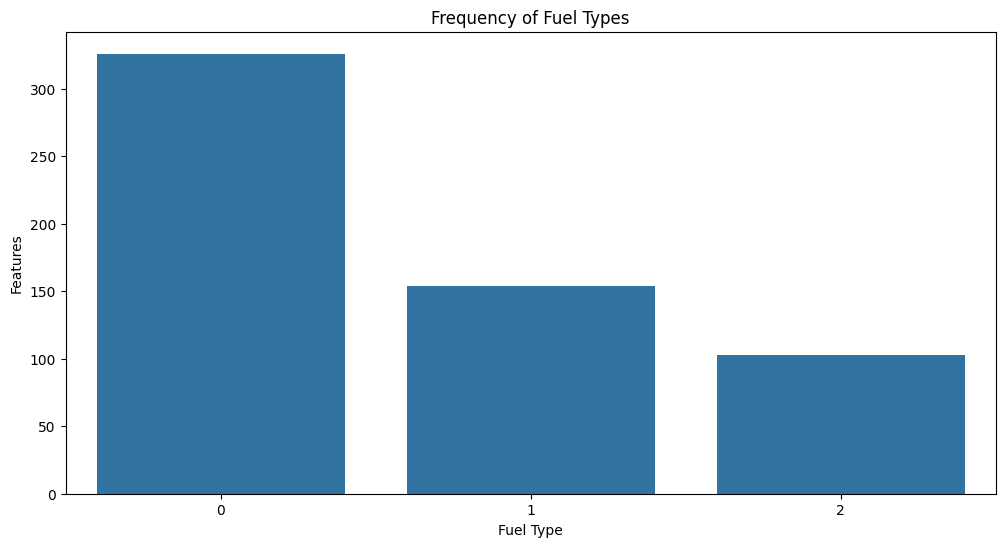

In [38]:
#Barplot
plt.figure(figsize=(12,6))
sns.countplot(x='Fuel_Type',data=dataset)
plt.xlabel('Fuel Type')
plt.ylabel('Features')
plt.title('Frequency of Fuel Types')
plt.show()

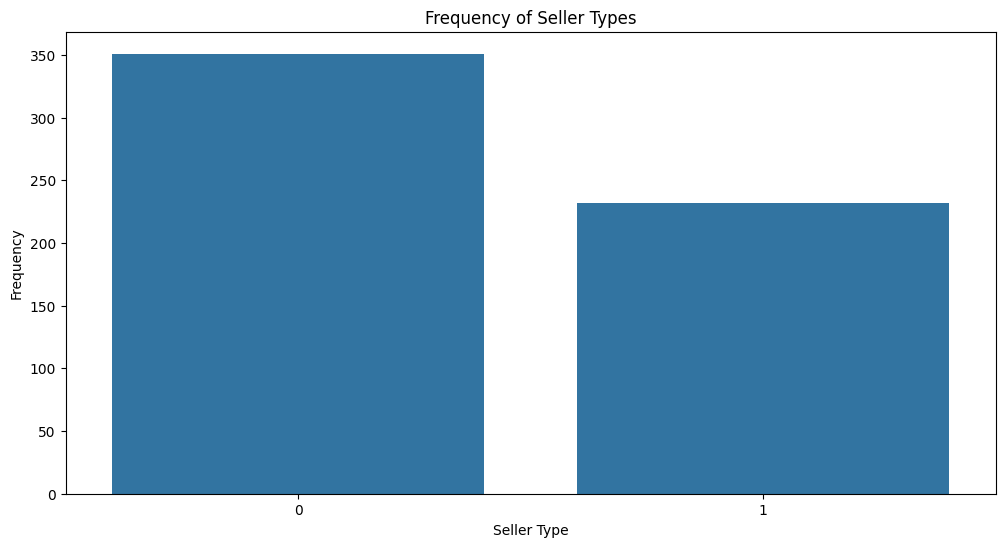

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Seller_Type', data=dataset)
plt.title('Frequency of Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Frequency')
plt.show()

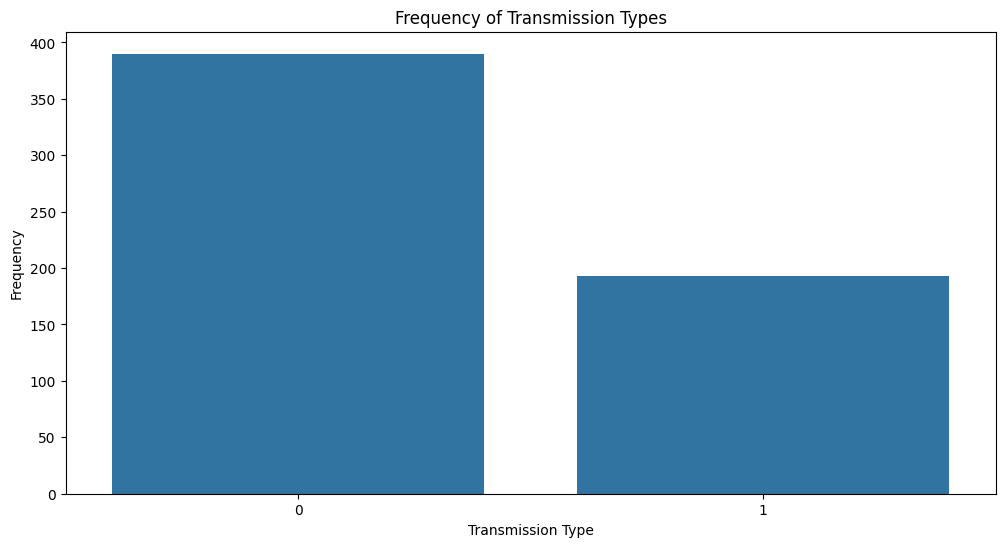

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Transmission', data=dataset)
plt.title('Frequency of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Frequency')
plt.show()

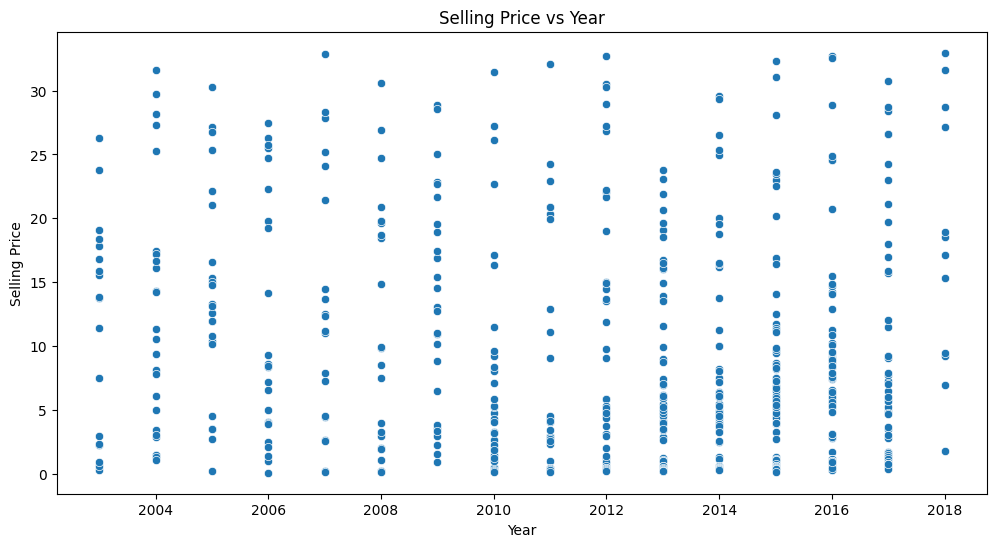

In [41]:
#Scatterplots
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Selling_Price', data=dataset)
plt.title('Selling Price vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

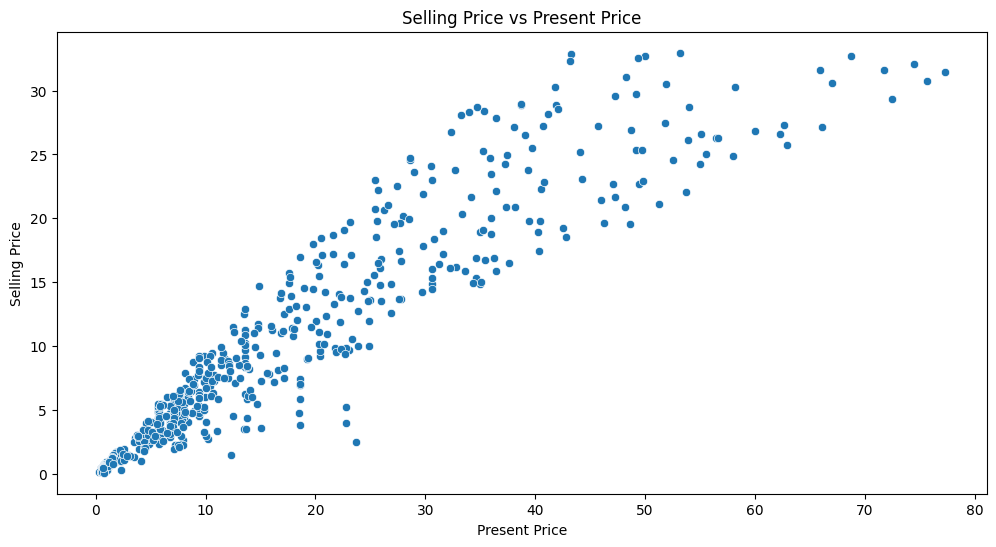

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=dataset)
plt.title('Selling Price vs Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

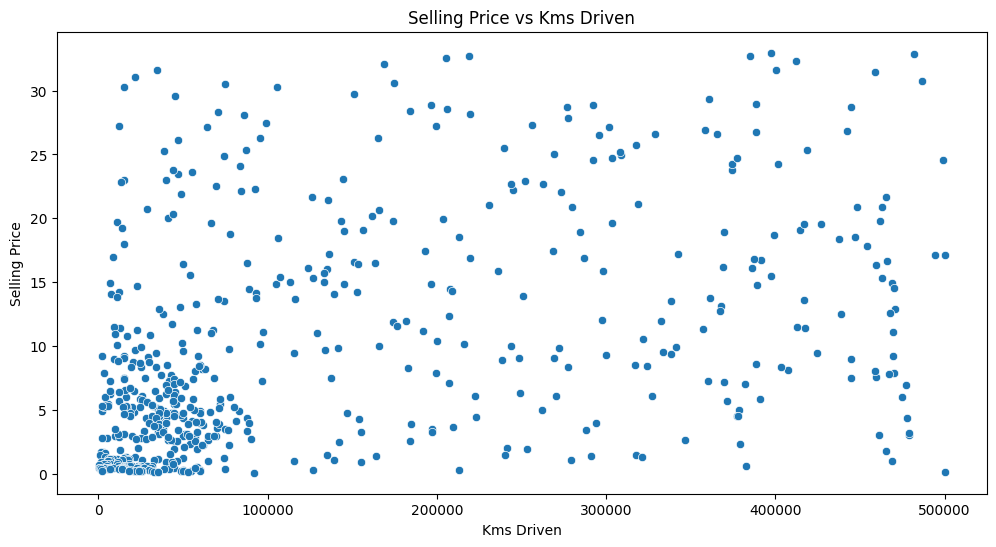

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=dataset)
plt.title('Selling Price vs Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.show()

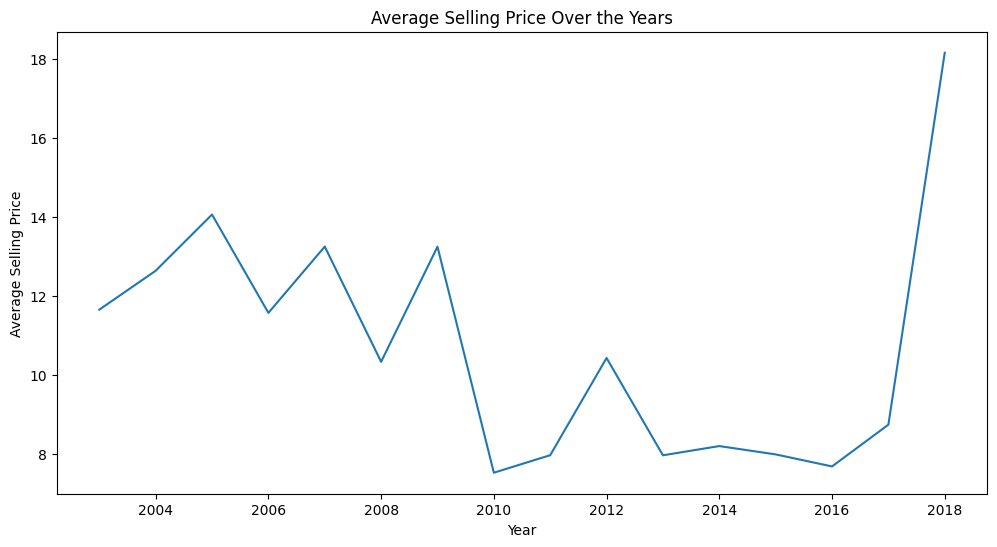

In [44]:
#Time Series Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Selling_Price', data=dataset.groupby('Year')['Selling_Price'].mean().reset_index())
plt.title('Average Selling Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.show()

##  **MODEL SELECTION AND TRAINING**

In [45]:
#Importing necessary libraries for model selection
from sklearn.model_selection import train_test_split

In [46]:
#Splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [47]:
#Imorting necessary Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [48]:
#Instantiating and training the models
lr = LinearRegression()
lr.fit(x_train,y_train)

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
#Predicting using each model
y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)
y_pred3 = gbr.predict(x_test)
y_pred4 = xg.predict(x_test)

In [50]:
from sklearn import metrics

### **Checking R2 SCORE value**

In [51]:
#R2 Score for each model
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [52]:
print(score1,score2,score3,score4)

0.8817524286156316 0.9059418353114914 0.9121364815591719 0.9023291646914051


In [53]:
#Storing the metrics values in a DataFrame
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],"R2_SCORE":[score1,score2,score3,score4]})

In [54]:
final_data

,Models,R2_SCORE
0,LR,0.881752
1,RF,0.905942
2,GBR,0.912136
3,XG,0.902329


## **Visualizing R2 SCORE**

<Axes: xlabel='Models', ylabel='R2_SCORE'>

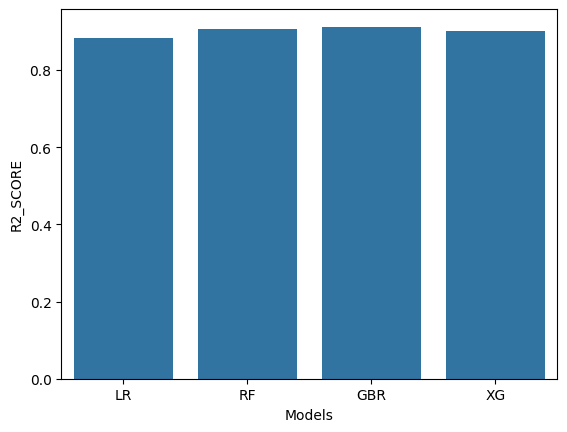

In [55]:
#Plotting R2_SCORE v
sns.barplot(x='Models',y='R2_SCORE', data=final_data)

In [56]:
#Builiding the predictive model with high accuracy of R2 SCORE anf fitting to rf Regressor
rf = RandomForestRegressor()
rf_final = rf.fit(x,y)

In [57]:
dataset.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,11
1,sx4,2013,4.75,9.54,43000,1,0,0,0,12


### **Checking for different regression models**

In [58]:
lr = LinearRegression()
lr_final = lr.fit(x,y)

In [61]:
gbr = GradientBoostingRegressor()
gbr_final = gbr.fit(x,y)

In [63]:
xg = XGBRegressor()
xg_final = xg.fit(x,y)

## **Building Predictive Model**

In [64]:
# User input for Predictive System
input_data = (2013,9.54,43000,1,0,0,0,11)

In [65]:
!# Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [66]:
# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
input_data_reshaped = pd.DataFrame(input_data_reshaped, columns=x_train.columns)

### **FINAL RESULT PRICE FOR THE BEST MODEL**

In [67]:
# Prediction
prediction = rf.predict(input_data_reshaped)
print("The selling price of a car is:", prediction[0])

The selling price of a car is: 5.726199999999998


### **Checking for other models**

In [68]:
# Prediction for linear regression
prediction = lr.predict(input_data_reshaped)
print("The selling price of a car is:", prediction[0])

The selling price of a car is: 6.738425378110563


In [69]:
# Prediction for gradientbooster regression
prediction = gbr.predict(input_data_reshaped)
print("The selling price of a car is:", prediction[0])

The selling price of a car is: 6.048513454318116


In [70]:
# Prediction for xgbooster regression
prediction = xg.predict(input_data_reshaped)
print("The selling price of a car is:", prediction[0])

The selling price of a car is: 4.902431


## **Saving the Predictive Model**

In [71]:
#Importing the pickle Library
import pickle as pic

In [72]:
# Saving the Model
filename = "car_Model.sav"
pic.dump(rf, open(filename, 'wb'))

In [73]:
#Loading the Model
loaded_model = pic.load(open(filename, 'rb'))

In [74]:
# Prediction using the loaded model
prediction = loaded_model.predict(input_data_reshaped)
print("The selling price of a car is:", prediction[0])

The selling price of a car is: 5.726199999999998


# **GUI**

In [75]:
#Graphical user Interface for the model
import ipywidgets as widgets
from IPython.display import display, clear_output
import datetime

# Widgets for user inputs
present_price = widgets.FloatText(
    value=5.0,
    description='Present Price (L):',
    style={'description_width': 'initial'}
)

kms_driven = widgets.IntText(
    value=50000,
    description='Kms Driven:',
    style={'description_width': 'initial'}
)

fuel_type = widgets.Dropdown(
    options=[('Petrol', 0), ('Diesel', 1), ('CNG', 2)],
    value=0,
    description='Fuel Type:',
    style={'description_width': 'initial'}
)

seller_type = widgets.Dropdown(
    options=[('Dealer', 0), ('Individual', 1)],
    value=0,
    description='Seller Type:',
    style={'description_width': 'initial'}
)

transmission = widgets.Dropdown(
    options=[('Manual', 0), ('Automatic', 1)],
    value=0,
    description='Transmission:',
    style={'description_width': 'initial'}
)

owner = widgets.Dropdown(
    options=[0, 1, 2, 3],
    value=0,
    description='Owner Count:',
    style={'description_width': 'initial'}
)

year = widgets.IntSlider(
    value=2018,
    min=1995,
    max=datetime.datetime.now().year,
    step=1,
    description='Car Year:',
    style={'description_width': 'initial'},
    continuous_update=False
)

# Output area
output = widgets.Output()

# Button
predict_button = widgets.Button(
    description='Predict Selling Price',
    button_style='success',
    tooltip='Click to Predict'
)

# Prediction Function
def predict_price(b):
    output.clear_output()
    with output:
        age = datetime.datetime.now().year - year.value

        # Now including both Year and Age to match 8 features
        input_data = [[
            present_price.value,
            kms_driven.value,
            fuel_type.value,
            seller_type.value,
            transmission.value,
            owner.value,
            year.value,
            age
        ]]

        prediction = rf_final.predict(input_data)
        print(f"\n🔮 Predicted Selling Price: ₹ {prediction[0]:,.2f} lakhs\n")

predict_button.on_click(predict_price)

# Display everything
display(widgets.VBox([
    present_price,
    kms_driven,
    fuel_type,
    seller_type,
    transmission,
    owner,
    year,
    predict_button,
    output
]))


# **PROJECT SUMMARY**
Throughout this project, we embarked on a journey to develop a robust machine learning model for predicting car prices. We began by collecting and preprocessing a dataset containing information about different car attributes such as year of manufacture, present price, kilometers driven, fuel type, seller type, transmission, and owner history.

After exploring and cleaning the data, we engineered features and encoded categorical variables to prepare them for model training. We then selected multiple regression models, including Linear Regression, Random Forest Regression, Gradient Boosting Regression, and XGBoost Regression, and trained them on our preprocessed dataset.

Following model training, we evaluated each model's performance using metrics such as R-squared score and accuracy. Through extensive experimentation and fine-tuning, we identified the Random Forest Regression model as the most accurate predictor of car prices.

In conclusion, our project succeeded in developing a reliable machine learning model for predicting car prices, which can provide valuable insights for both car sellers and buyers in the used car market. By leveraging data-driven approaches, we aim to enhance transparency and efficiency in the car buying and selling process, ultimately benefiting consumers and industry stakeholders alike.# Importing warnings module to ignore warnings